In [1]:
# Import the google drive folders that contain the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/DSC680/Weeks1-4/Week2/data/

/content/drive/MyDrive/DSC680/Weeks1-4/Week2/data


In [3]:
%ls

antidepressant/   depression_dataset_reddit_cleaned.csv/  glove.6B.zip
antidepressants/  glove.6B.100d.txt                       hopeless/
archive/          glove.6B.200d.txt                       lonely/
depressed/        glove.6B.300d.txt                       suicide/
depression/       glove.6B.50d.txt


In [4]:
import pandas as pd
import numpy as np

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [5]:
depressive_tweets_df = pd.read_csv('depression/depressive_unigram_tweets.csv')
depressive_tweets_df.head()

<ipython-input-5-2876e22e5a5f>:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  depressive_tweets_df = pd.read_csv('depression/depressive_unigram_tweets.csv')


,Unnamed: 0,id,time,tweet,hashtags,cashtags
0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]


In [7]:
hopeless_tweets_df = pd.read_csv('hopeless/tweets.csv')
hopeless_tweets_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,likes_count,hashtags,cashtags,link,retweet,quote_url,video,user_rt_id,near,geo
0,1151526536471728134,1151526536471728134,1563380295000,2019-07-17,09:18:15,PDT,1070085811650117633,greesybot,greesybot,NaN,...,0,[],[],https://twitter.com/greesybot/status/115152653...,NaN,NaN,0,NaN,NaN,NaN
1,1151526442922139649,1151524002457882624,1563380272000,2019-07-17,09:17:52,PDT,853583752483807232,umutsuz_vakayim,Hopeless,NaN,...,0,[],[],https://twitter.com/umutsuz_vakayim/status/115...,NaN,NaN,0,NaN,NaN,NaN
2,1151526396210110464,1151526396210110464,1563380261000,2019-07-17,09:17:41,PDT,1120246244075626496,hopeless95,𐂂,NaN,...,1,[],[],https://twitter.com/hopeless95/status/11515263...,NaN,NaN,0,NaN,NaN,NaN
3,1151526283890683904,1151525753990725632,1563380235000,2019-07-17,09:17:15,PDT,1147135129489301505,hopehopexx,Hopeless,NaN,...,0,[],[],https://twitter.com/Hopehopexx/status/11515262...,NaN,NaN,0,NaN,NaN,NaN
4,1151526267738628097,1151526267738628097,1563380231000,2019-07-17,09:17:11,PDT,1120246244075626496,hopeless95,𐂂,NaN,...,1,[],[],https://twitter.com/hopeless95/status/11515262...,NaN,NaN,0,NaN,NaN,NaN


In [8]:
hopeless_tweets_df.drop(['date', 'timezone', 'username', 'name', 'conversation_id', 'created_at', 'user_id', 'place', 'likes_count', 'link', 'retweet', 'quote_url', 'video', 'user_rt_id', 'near', 'geo', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count'], axis = 1, inplace = True)
hopeless_tweets_df.head()

,id,time,tweet,hashtags,cashtags
0,1151526536471728134,09:18:15,"Hopeless, crazed, and dispossessed, I walked o...",[],[]
1,1151526442922139649,09:17:52,KAP haberini beklerken serSERİn olmuştuk,[],[]
2,1151526396210110464,09:17:41,17-july-2019. 🦉💛.,[],[]
3,1151526283890683904,09:17:15,เป็นไรสาวน้อย,[],[]
4,1151526267738628097,09:17:11,انا قاعده اعيش اسعد ايام حياتي💛.,[],[]


In [9]:
lonely_tweets_df = pd.read_csv('lonely/tweets.csv')
lonely_tweets_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,likes_count,hashtags,cashtags,link,retweet,quote_url,video,user_rt_id,near,geo
0,1152982582843326466,1152982582843326466,1563727443000,2019-07-21,09:44:03,PDT,1151002890573701120,monbebe93,제시카,NaN,...,0,[],[],https://twitter.com/monbebe93/status/115298258...,NaN,https://twitter.com/OI_IO999/status/1152978766...,0,NaN,NaN,NaN
1,1152982578741284865,1152916420587675648,1563727442000,2019-07-21,09:44:02,PDT,1065697539259854849,sugarplum_skz,lonely wolf,NaN,...,0,[],[],https://twitter.com/sugarplum_skz/status/11529...,NaN,NaN,0,NaN,NaN,NaN
2,1152982577181024259,1152976191781048322,1563727442000,2019-07-21,09:44:02,PDT,704212959950667776,lonely_walsh,Elizabeth,NaN,...,0,[],[],https://twitter.com/lonely_walsh/status/115298...,NaN,NaN,0,NaN,NaN,NaN
3,1152982576153239552,1152982576153239552,1563727442000,2019-07-21,09:44:02,PDT,284959188,lonelyoakradio,Lonely Oak radio,NaN,...,0,['#nowplaying'],[],https://twitter.com/LonelyOakRadio/status/1152...,NaN,NaN,0,NaN,NaN,NaN
4,1152982566263296000,1152982566263296000,1563727439000,2019-07-21,09:43:59,PDT,144328187,noelle_amor,YaYa🌹,NaN,...,0,[],[],https://twitter.com/Noelle_Amor/status/1152982...,NaN,NaN,0,NaN,NaN,NaN


In [10]:
lonely_tweets_df.drop(['date', 'timezone', 'username', 'name', 'conversation_id', 'created_at', 'user_id', 'place', 'likes_count', 'link', 'retweet', 'quote_url', 'video', 'user_rt_id', 'near', 'geo', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count'], axis = 1, inplace = True)
lonely_tweets_df.head()

,id,time,tweet,hashtags,cashtags
0,1152982582843326466,09:44:03,i dont know why but he looks so lonely in this...,[],[]
1,1152982578741284865,09:44:02,Я после того как увидела их начала отращивать ...,[],[]
2,1152982577181024259,09:44:02,Even follow you on all social networks,[],[]
3,1152982576153239552,09:44:02,"#Nowplaying: Garmonsway, Gibbon and Harrington...",['#nowplaying'],[]
4,1152982566263296000,09:43:59,Laying in this hammock every Sunday alone is g...,[],[]


In [11]:
antidepressant_tweets_df = pd.read_csv('antidepressant/tweets.csv')
antidepressant_tweets_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,likes_count,hashtags,cashtags,link,retweet,quote_url,video,user_rt_id,near,geo
0,1152991919137538048,1152991908391739392,1563729669000,2019-07-21,10:21:09,PDT,794617098106441728,harlequimsy,Darnielle 🤦🏻‍♀️,NaN,...,0,[],[],https://twitter.com/harlequimsy/status/1152991...,NaN,NaN,0,NaN,NaN,NaN
1,1152991631722913793,1152991631722913793,1563729601000,2019-07-21,10:20:01,PDT,959487925992947714,aspiringapollo,Anthony,NaN,...,0,[],[],https://twitter.com/AspiringApollo/status/1152...,NaN,NaN,0,NaN,NaN,NaN
2,1152991531789406209,1152986023447732224,1563729577000,2019-07-21,10:19:37,PDT,2391838146,al_pal_22,brogram,NaN,...,0,[],[],https://twitter.com/al_pal_22/status/115299153...,NaN,NaN,0,NaN,NaN,NaN
3,1152991116733628416,1152991116733628416,1563729478000,2019-07-21,10:17:58,PDT,510205955,iceberged,Iceberg SelfHelp,NaN,...,0,"['#medication', '#antidepressants', '#eatingdi...",[],https://twitter.com/IcebergED/status/115299111...,NaN,NaN,0,NaN,NaN,NaN
4,1152990783420751872,1152862679452790785,1563729398000,2019-07-21,10:16:38,PDT,34530161,matchlessmarie,Amanda [matchless] Marie,NaN,...,1,[],[],https://twitter.com/MatchlessMarie/status/1152...,NaN,NaN,0,NaN,NaN,NaN


In [12]:
antidepressant_tweets_df.drop(['date', 'timezone', 'username', 'name', 'conversation_id', 'created_at', 'user_id', 'place', 'likes_count', 'link', 'retweet', 'quote_url', 'video', 'user_rt_id', 'near', 'geo', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count'], axis = 1, inplace = True)
antidepressant_tweets_df.head()

,id,time,tweet,hashtags,cashtags
0,1152991919137538048,10:21:09,I hate that the antidepressants made me feel w...,[],[]
1,1152991631722913793,10:20:01,Your beliefs ultimately are manifested in your...,[],[]
2,1152991531789406209,10:19:37,I think current trends lead to a world where e...,[],[]
3,1152991116733628416,10:17:58,Anti-Depressants and Recovery https://www.mar...,"['#medication', '#antidepressants', '#eatingdi...",[]
4,1152990783420751872,10:16:38,Have you thought about getting a sleep study d...,[],[]


In [13]:
antidepressants_tweets_df = pd.read_csv('antidepressants/tweets.csv')
antidepressants_tweets_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,likes_count,hashtags,cashtags,link,retweet,quote_url,video,user_rt_id,near,geo
0,1152995178359218176,1152995178359218176,1563730446000,2019-07-21,10:34:06,PDT,1134809541818929152,neumnelo,🍓⚢,NaN,...,0,[],[],https://twitter.com/neumnelo/status/1152995178...,NaN,NaN,0,NaN,NaN,NaN
1,1152994945537576960,1152994945537576960,1563730391000,2019-07-21,10:33:11,PDT,709759485162598400,csevern5,C Severn,NaN,...,0,[],[],https://twitter.com/csevern5/status/1152994945...,NaN,NaN,0,NaN,NaN,NaN
2,1152994834359209985,1152994145700634625,1563730364000,2019-07-21,10:32:44,PDT,969718541703368704,healingapriori,A Kid That Knows Nothing,NaN,...,0,[],[],https://twitter.com/healingapriori/status/1152...,NaN,NaN,0,NaN,NaN,NaN
3,1152994452606033920,1152994452606033920,1563730273000,2019-07-21,10:31:13,PDT,864470942159953920,liferenewedjax,Life Renewed Counseling,NaN,...,0,[],[],https://twitter.com/liferenewedjax/status/1152...,NaN,NaN,0,NaN,NaN,NaN
4,1152994432188370949,1152994432188370949,1563730268000,2019-07-21,10:31:08,PDT,1029517541608108033,glitterfairy420,𝕵𝖊𝖓𝖓𝖎𝖋𝖊𝖗★,NaN,...,0,[],[],https://twitter.com/Glitterfairy420/status/115...,NaN,NaN,0,NaN,NaN,NaN


In [14]:
antidepressants_tweets_df.drop(['date', 'timezone', 'username', 'name', 'conversation_id', 'created_at', 'user_id', 'place', 'likes_count', 'link', 'retweet', 'quote_url', 'video', 'user_rt_id', 'near', 'geo', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count'], axis = 1, inplace = True)
antidepressants_tweets_df.head()

,id,time,tweet,hashtags,cashtags
0,1152995178359218176,10:34:06,i can't think logically and all of shit i say ...,[],[]
1,1152994945537576960,10:33:11,Recently moved to Australia and was ASTOUNDED ...,[],[]
2,1152994834359209985,10:32:44,Maybe I should go back on my antidepressants. ...,[],[]
3,1152994452606033920,10:31:13,What It’s Like to Know You’ll Be on Antidepres...,[],[]
4,1152994432188370949,10:31:08,Do antidepressants work? :/,[],[]


In [15]:
suicide_tweets_df = pd.read_csv('suicide/tweets.csv')
suicide_tweets_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,likes_count,hashtags,cashtags,link,retweet,quote_url,video,user_rt_id,near,geo
0,1152996044604682241,1152996044604682241,1563730653000,2019-07-21,10:37:33,PDT,2958699552,imonlylj,Misunderśtøød x Mìdaś ㊗️️,NaN,...,0,[],[],https://twitter.com/ImonlyLj/status/1152996044...,NaN,NaN,0,NaN,NaN,NaN
1,1152995993148899329,1152995993148899329,1563730641000,2019-07-21,10:37:21,PDT,29907109,_kingneal,King.,NaN,...,0,[],[],https://twitter.com/_kingneal/status/115299599...,NaN,NaN,0,NaN,NaN,NaN
2,1152995985053900800,1152995985053900800,1563730639000,2019-07-21,10:37:19,PDT,1152971452846694401,ventingbroken,Venting (More people are broken than it seems),NaN,...,0,[],[],https://twitter.com/VentingBroken/status/11529...,NaN,NaN,0,NaN,NaN,NaN
3,1152995984642887683,1152995984642887683,1563730639000,2019-07-21,10:37:19,PDT,2561945708,awesome_thebest,Just me,NaN,...,0,[],[],https://twitter.com/awesome_thebest/status/115...,NaN,NaN,0,NaN,NaN,NaN
4,1152995955559620608,1152995955559620608,1563730632000,2019-07-21,10:37:12,PDT,891371293563596800,drmo7og,Dr.mo7og,NaN,...,0,"['#sam', '#suicide']",[],https://twitter.com/DrMo7oG/status/11529959555...,NaN,NaN,0,NaN,NaN,NaN


In [16]:
suicide_tweets_df.drop(['date', 'timezone', 'username', 'name', 'conversation_id', 'created_at', 'user_id', 'place', 'likes_count', 'link', 'retweet', 'quote_url', 'video', 'user_rt_id', 'near', 'geo', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count'], axis = 1, inplace = True)
suicide_tweets_df.head()

,id,time,tweet,hashtags,cashtags
0,1152996044604682241,10:37:33,Suicide Thoughts ....,[],[]
1,1152995993148899329,10:37:21,If I wake up as a white person in my next life...,[],[]
2,1152995985053900800,10:37:19,I fixed my bio (Cant add a banner because Twit...,[],[]
3,1152995984642887683,10:37:19,Weaponizign Suicide disturbs me a lot Cardi B ...,[],[]
4,1152995955559620608,10:37:12,#sam harcelé par ses camarades de classe se #s...,"['#sam', '#suicide']",[]


In [18]:
df_row_reindex = pd.concat([depressive_tweets_df, hopeless_tweets_df, lonely_tweets_df, antidepressant_tweets_df, antidepressants_tweets_df, suicide_tweets_df], ignore_index=True)

df_row_reindex

,Unnamed: 0,id,time,tweet,hashtags,cashtags
0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]
...,...,...,...,...,...,...
225172,NaN,1152367589030391809,17:00:17,えっ？！オニィ結構なお歳……（今知った） 変な声でちゃった(笑),[],[]
225173,NaN,1152367565483761664,17:00:12,"#PhysicianFriday ""Let's empower doctors to tak...","['#physicianfriday', '#suicide', '#physicians'...",[]
225174,NaN,1152367519283367936,17:00:01,A spike in suicides among teenage boys in the ...,"['#aztrauma', '#traumatraining', '#suicide', '...",[]
225175,NaN,1152367516083204096,17:00:00,Need some support? Check out the following res...,[],[]


In [19]:
df = df_row_reindex
depressive_twint_tweets_df = df_row_reindex
depressive_twint_tweets_df.head()

,Unnamed: 0,id,time,tweet,hashtags,cashtags
0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]


In [20]:
depressive_twint_tweets_df = df.drop_duplicates()
depressive_twint_tweets_df

,Unnamed: 0,id,time,tweet,hashtags,cashtags
0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]
...,...,...,...,...,...,...
225172,NaN,1152367589030391809,17:00:17,えっ？！オニィ結構なお歳……（今知った） 変な声でちゃった(笑),[],[]
225173,NaN,1152367565483761664,17:00:12,"#PhysicianFriday ""Let's empower doctors to tak...","['#physicianfriday', '#suicide', '#physicians'...",[]
225174,NaN,1152367519283367936,17:00:01,A spike in suicides among teenage boys in the ...,"['#aztrauma', '#traumatraining', '#suicide', '...",[]
225175,NaN,1152367516083204096,17:00:00,Need some support? Check out the following res...,[],[]


In [21]:
export_csv = depressive_twint_tweets_df.to_csv(r'depressive_unigram_tweets_final.csv')

In [22]:
pd.read_csv('depressive_unigram_tweets_final.csv')

<ipython-input-22-7e41448687eb>:1: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('depressive_unigram_tweets_final.csv')


,Unnamed: 0.1,Unnamed: 0,id,time,tweet,hashtags,cashtags
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]
...,...,...,...,...,...,...,...
2783571,225172,NaN,1152367589030391809,17:00:17,えっ？！オニィ結構なお歳……（今知った） 変な声でちゃった(笑),[],[]
2783572,225173,NaN,1152367565483761664,17:00:12,"#PhysicianFriday ""Let's empower doctors to tak...","['#physicianfriday', '#suicide', '#physicians'...",[]
2783573,225174,NaN,1152367519283367936,17:00:01,A spike in suicides among teenage boys in the ...,"['#aztrauma', '#traumatraining', '#suicide', '...",[]
2783574,225175,NaN,1152367516083204096,17:00:00,Need some support? Check out the following res...,[],[]


In [24]:
#pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 5.0 MB/s eta 0:00:00


In [47]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
df2 = pd.read_csv('depressive_unigram_tweets_final.csv')

<ipython-input-48-ad3be7df4ff4>:1: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('depressive_unigram_tweets_final.csv')


In [49]:
df2.head()

,Unnamed: 0.1,Unnamed: 0,id,time,tweet,hashtags,cashtags
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]


In [50]:
df2.describe()

,Unnamed: 0.1,Unnamed: 0,id,time,tweet,hashtags,cashtags
count,2783576,135509,1650624,1650612,1650599,224225,224225
unique,224295,135498,88916,91659,130400,7176,36
top,لذا من الواجب انك تسمع التالي,[],1152472981605670913,23:59:05,تراني على خبرك واحبك ولا اسمع فيك,[],[]
freq,131072,12,128023,128026,128024,205128,224152


In [51]:
df2.isnull().any().any()  

True

In [52]:
df2.info(null_counts=True) 

<ipython-input-52-95a5507eb04f>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df2.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783576 entries, 0 to 2783575
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Unnamed: 0.1  2783576 non-null  object
 1   Unnamed: 0    135509 non-null   object
 2   id            1650624 non-null  object
 3   time          1650612 non-null  object
 4   tweet         1650599 non-null  object
 5   hashtags      224225 non-null   object
 6   cashtags      224225 non-null   object
dtypes: object(7)
memory usage: 148.7+ MB


In [53]:
df_new = df2[df2['tweet'].notnull()]
df_new.info(null_counts=True)

<ipython-input-53-12d98fb4283e>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_new.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650599 entries, 0 to 2783575
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Unnamed: 0.1  1650599 non-null  object
 1   Unnamed: 0    135474 non-null   object
 2   id            1650599 non-null  object
 3   time          1650599 non-null  object
 4   tweet         1650599 non-null  object
 5   hashtags      224225 non-null   object
 6   cashtags      224225 non-null   object
dtypes: object(7)
memory usage: 100.7+ MB


In [54]:
df_new.isnull().any().any() 

True

In [55]:
df_new['clean_tweet'] = df_new['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords])) 

<ipython-input-55-c4fa714326d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clean_tweet'] = df_new['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))


In [56]:
df_new.head()

,Unnamed: 0.1,Unnamed: 0,id,time,tweet,hashtags,cashtags,clean_tweet
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi..."
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx..."
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...


In [57]:
df_new['vader_score'] = df_new['clean_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

<ipython-input-57-467c7b3b47b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['vader_score'] = df_new['clean_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [58]:
df_new.head()

,Unnamed: 0.1,Unnamed: 0,id,time,tweet,hashtags,cashtags,clean_tweet,vader_score
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi...",-0.4122
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...,-0.8074
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...,0.3382
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx...",-0.4588
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...,-0.8316


In [59]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
#neutral_num = len(df_new[(df_new['vaderReviewScore'] >-0.05) & (df_new['vaderReviewScore']<0.05)])
negative_num = len(df_new[df_new['vader_score']<0.05])
#positive_num,neutral_num, negative_num
positive_num, negative_num

(49444, 1601155)

In [60]:
df_new.head()

,Unnamed: 0.1,Unnamed: 0,id,time,tweet,hashtags,cashtags,clean_tweet,vader_score
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi...",-0.4122
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...,-0.8074
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...,0.3382
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx...",-0.4588
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...,-0.8316


In [41]:
#df_new.loc[df_new['vaderReviewScore'] >=0.00,"vaderSentimentLabel"] = 1
#df_new.loc[df_new['vaderReviewScore']<=-0.00,"vaderSentimentLabel"] = 0

In [61]:
df_new.drop(['Unnamed: 0.1', 'id', 'time', 'tweet', ], axis = 1, inplace = True)

<ipython-input-61-5ea99b07ae2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['Unnamed: 0.1', 'id', 'time', 'tweet', ], axis = 1, inplace = True)


In [62]:
df_new = df_new[['Unnamed: 0', 'vader_sentiment_label', 'vader_score', 'clean_tweet']]
df_new.head()

KeyError: ignored

In [63]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
neutral_num = len(df_new[(df_new['vader_score'] >-0.05) & (df_new['vader_score']<0.05)])
negative_num = len(df_new[df_new['vader_score']<=-0.05])
positive_num,neutral_num, negative_num

(49444, 1485206, 115949)

In [64]:
df_new.to_csv('vader_processed_final.csv')

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk.corpus import stopwords
import re
from nltk import bigrams
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [66]:
df_new['text'] = df_new['clean_tweet']
df_new['text']

0          Wow, dad yday: “you don’t take stupid depressi...
1          part really harmfult lot people went every gui...
2          one ways I got #depression learning dance rain...
3          see wanna one say PTSD, depression, and/or anx...
4          IS IT clinical depression palpable hopelessnes...
                                 ...                        
2783571                     えっ？！オニィ結構なお歳……（今知った） 変な声でちゃった(笑)
2783572    #PhysicianFriday "Let's empower doctors take t...
2783573    A spike suicides among teenage boys United Sta...
2783574    Need support? Check following resources: Couns...
2783575    You improve quality life friend need. Learn Me...
Name: text, Length: 1650599, dtype: object

In [67]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [68]:
all_tweets_no_urls = [remove_url(tweet) for tweet in df_new['text']]
all_tweets_no_urls[:5]

['Wow dad yday you dont take stupid depression drugs anymore though you Because theyre absolute worst thing and never need them Aint great family supportive My moms sisters stance similar btw',
 'part really harmfult lot people went every guideline understand 13rw horror show supposed insight depression mental illness overall helpful public narrative topic',
 'one ways I got depression learning dance rain It source strength stronger circumstances UncoveringthenewU ChangeYourMindChangeYourCircumstances pictwittercom3vxKuQ0DvD',
 'see wanna one say PTSD depression andor anxiety play LIKEE',
 'IS IT clinical depression palpable hopelessness generation']

In [69]:
sentences = df_new['text']
all_tweets_no_urls[0].split()

['Wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'Because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'Aint',
 'great',
 'family',
 'supportive',
 'My',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [70]:
all_tweets_no_urls[0].lower().split()

['wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'aint',
 'great',
 'family',
 'supportive',
 'my',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [71]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['wow',
  'dad',
  'yday',
  'you',
  'dont',
  'take',
  'stupid',
  'depression',
  'drugs',
  'anymore',
  'though',
  'you',
  'because',
  'theyre',
  'absolute',
  'worst',
  'thing',
  'and',
  'never',
  'need',
  'them',
  'aint',
  'great',
  'family',
  'supportive',
  'my',
  'moms',
  'sisters',
  'stance',
  'similar',
  'btw'],
 ['part',
  'really',
  'harmfult',
  'lot',
  'people',
  'went',
  'every',
  'guideline',
  'understand',
  '13rw',
  'horror',
  'show',
  'supposed',
  'insight',
  'depression',
  'mental',
  'illness',
  'overall',
  'helpful',
  'public',
  'narrative',
  'topic']]

In [72]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('i', 65848),
 ('lonely', 55378),
 ('smile', 42634),
 ('wide', 42271),
 ('suicide', 39566),
 ('im', 29153),
 ('depression', 26013),
 ('like', 14866),
 ('depressed', 14064),
 ('people', 11913),
 ('hopeless', 11236),
 ('the', 10641),
 ('you', 10512),
 ('feel', 10500),
 ('its', 9617)]

In [73]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,i,65848
1,lonely,55378
2,smile,42634
3,wide,42271
4,suicide,39566


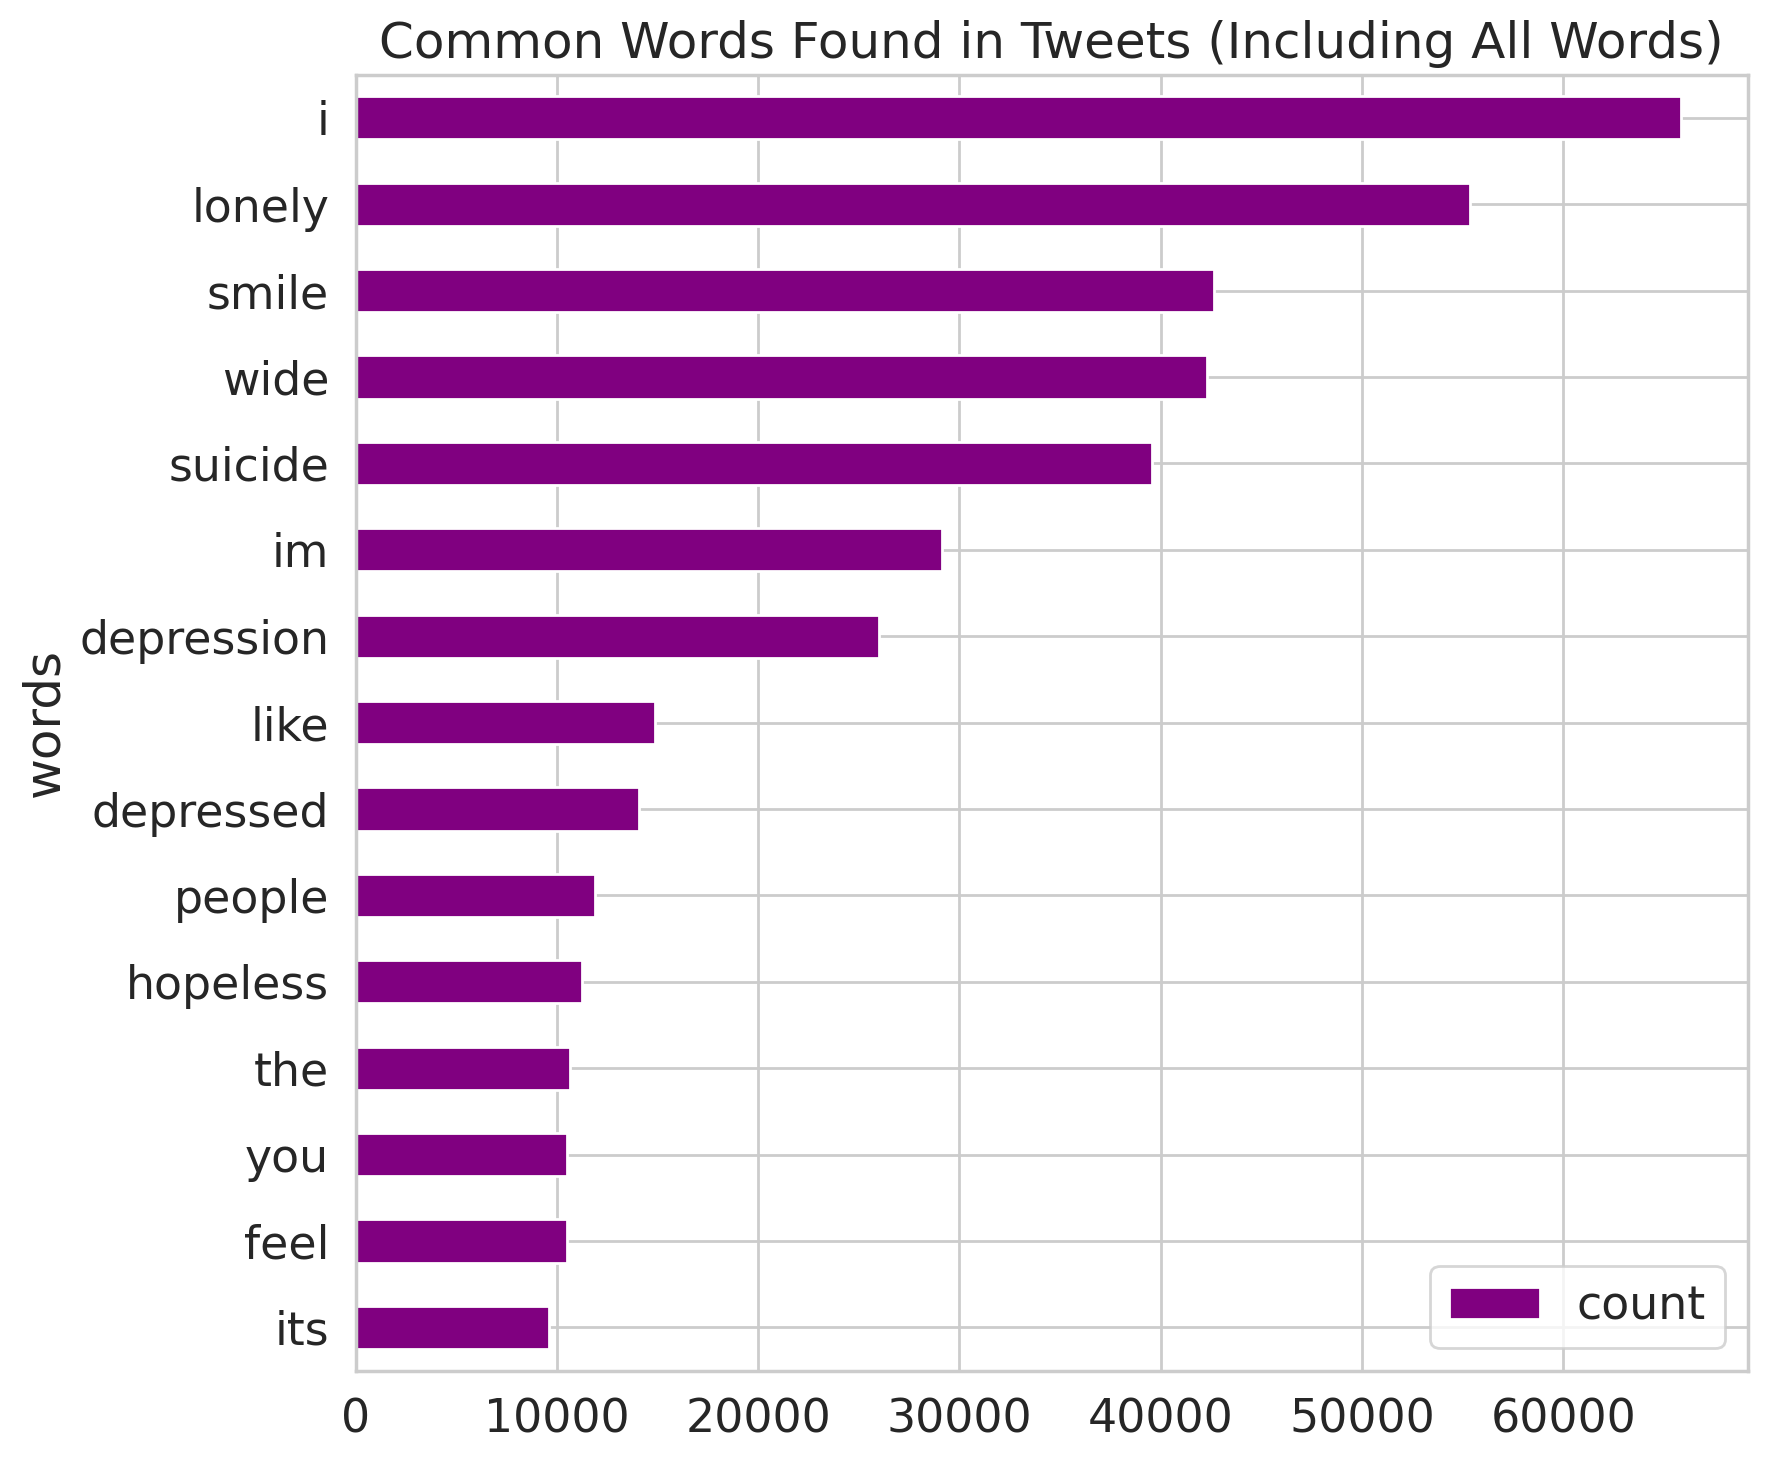

In [74]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [75]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

["doesn't",
 "that'll",
 "you're",
 "couldn't",
 'and',
 'ain',
 'nor',
 'each',
 'most',
 'only']

In [76]:
words_in_tweet[0]

['wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'aint',
 'great',
 'family',
 'supportive',
 'my',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [77]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [78]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('lonely', 55378),
 ('smile', 42634),
 ('wide', 42271),
 ('suicide', 39566),
 ('im', 29153),
 ('depression', 26013),
 ('like', 14866),
 ('depressed', 14064),
 ('people', 11913),
 ('hopeless', 11236),
 ('feel', 10500),
 ('get', 8998),
 ('one', 8971),
 ('de', 8204),
 ('know', 8041)]

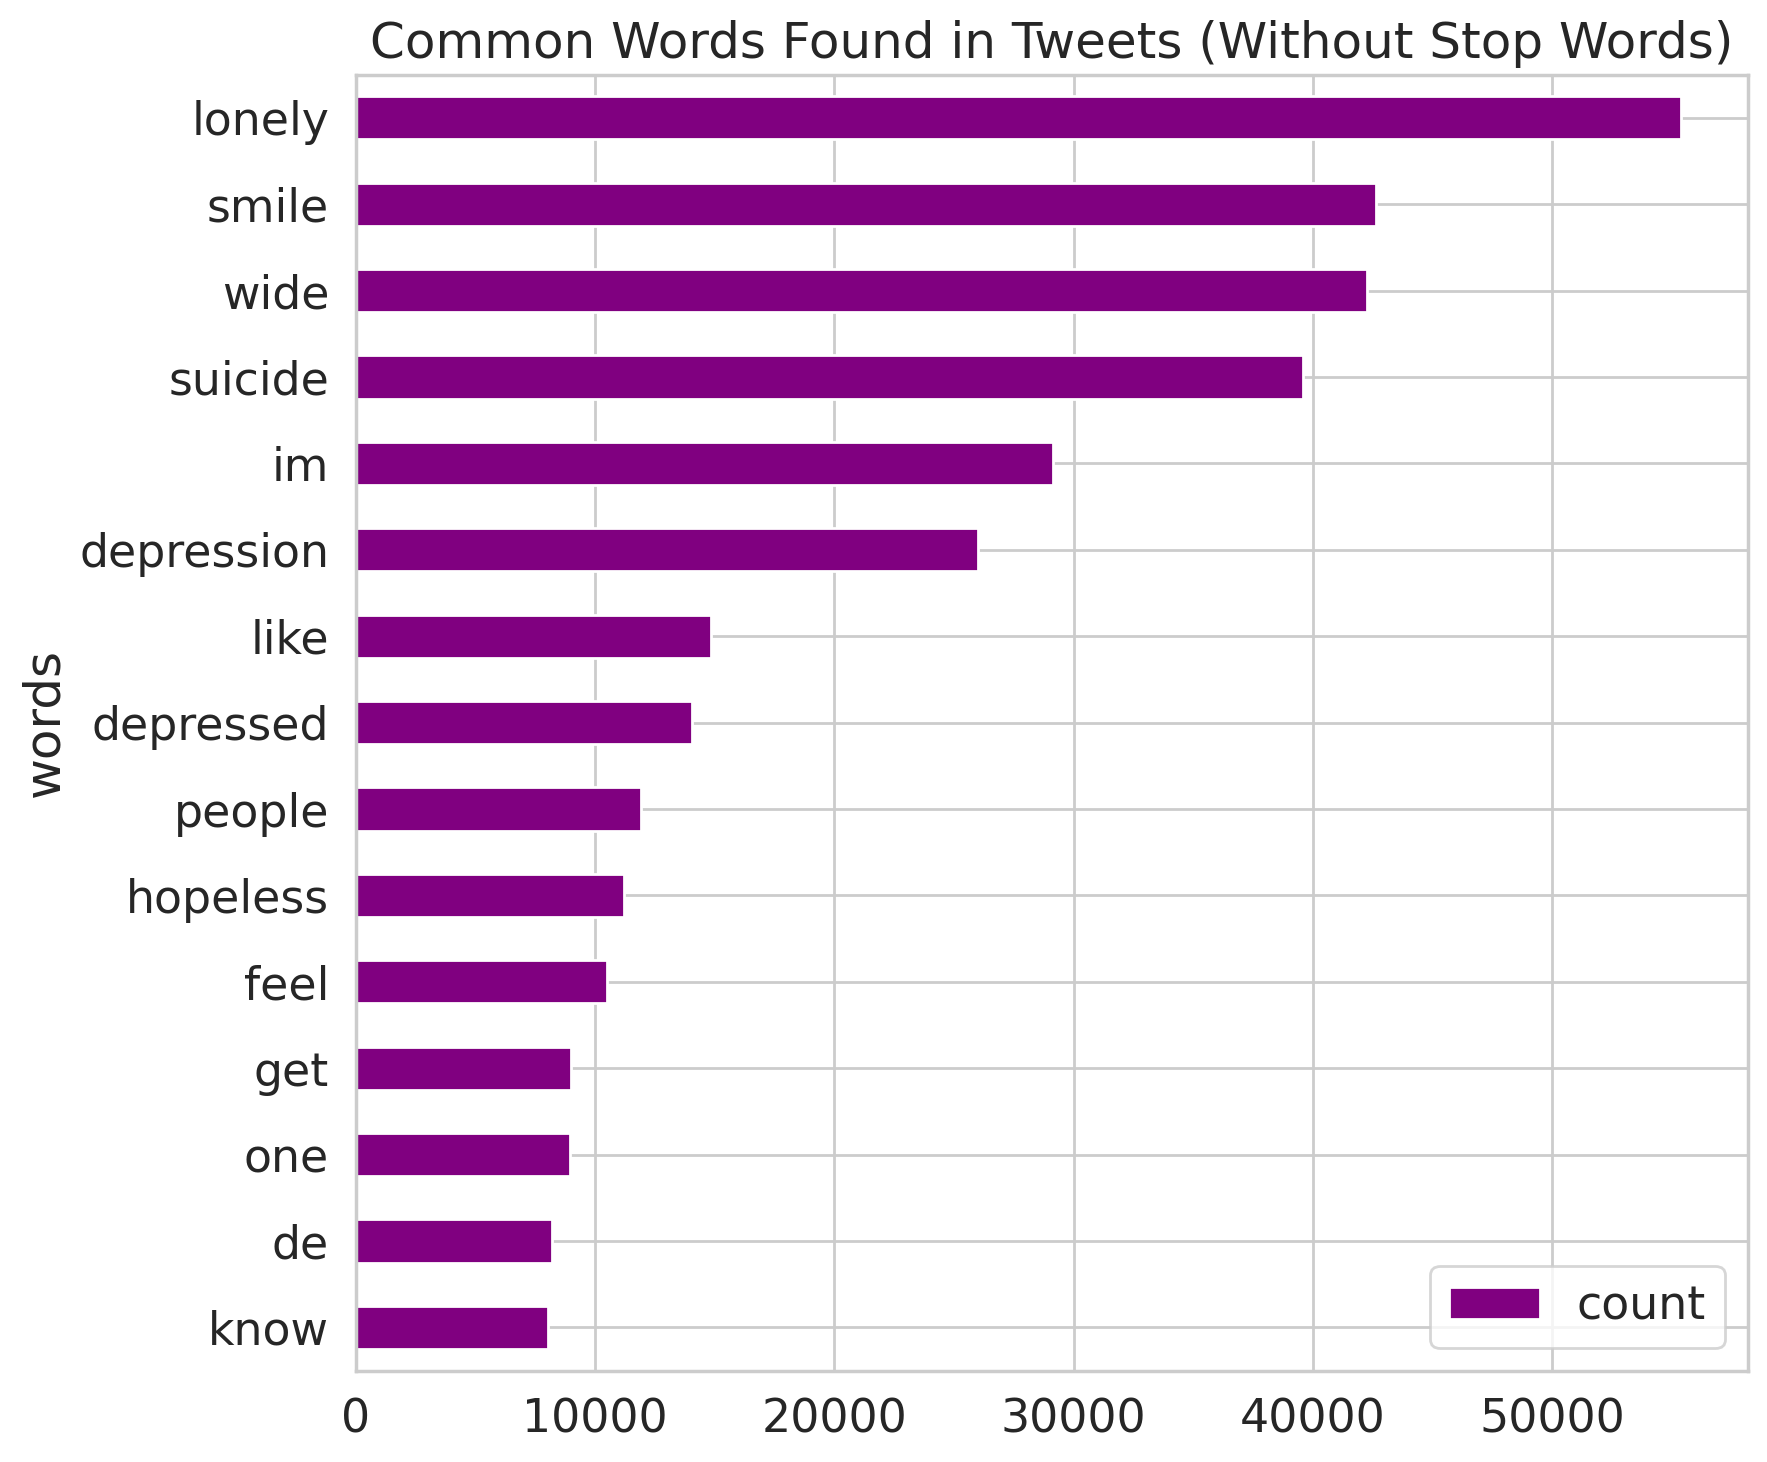

In [79]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [80]:
collection_words = ['im', 'de', 'like', 'one']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]
tweets_nsw[0]

['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [81]:
tweets_nsw_nc[0]

['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [82]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('lonely', 55378),
 ('smile', 42634),
 ('wide', 42271),
 ('suicide', 39566),
 ('depression', 26013),
 ('depressed', 14064),
 ('people', 11913),
 ('hopeless', 11236),
 ('feel', 10500),
 ('get', 8998),
 ('know', 8041),
 ('dont', 7855),
 ('time', 7433),
 ('life', 6812),
 ('love', 6585)]

In [84]:
len(counts_nsw_nc)

125585

In [86]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,lonely,55378
1,smile,42634
2,wide,42271
3,suicide,39566
4,depression,26013


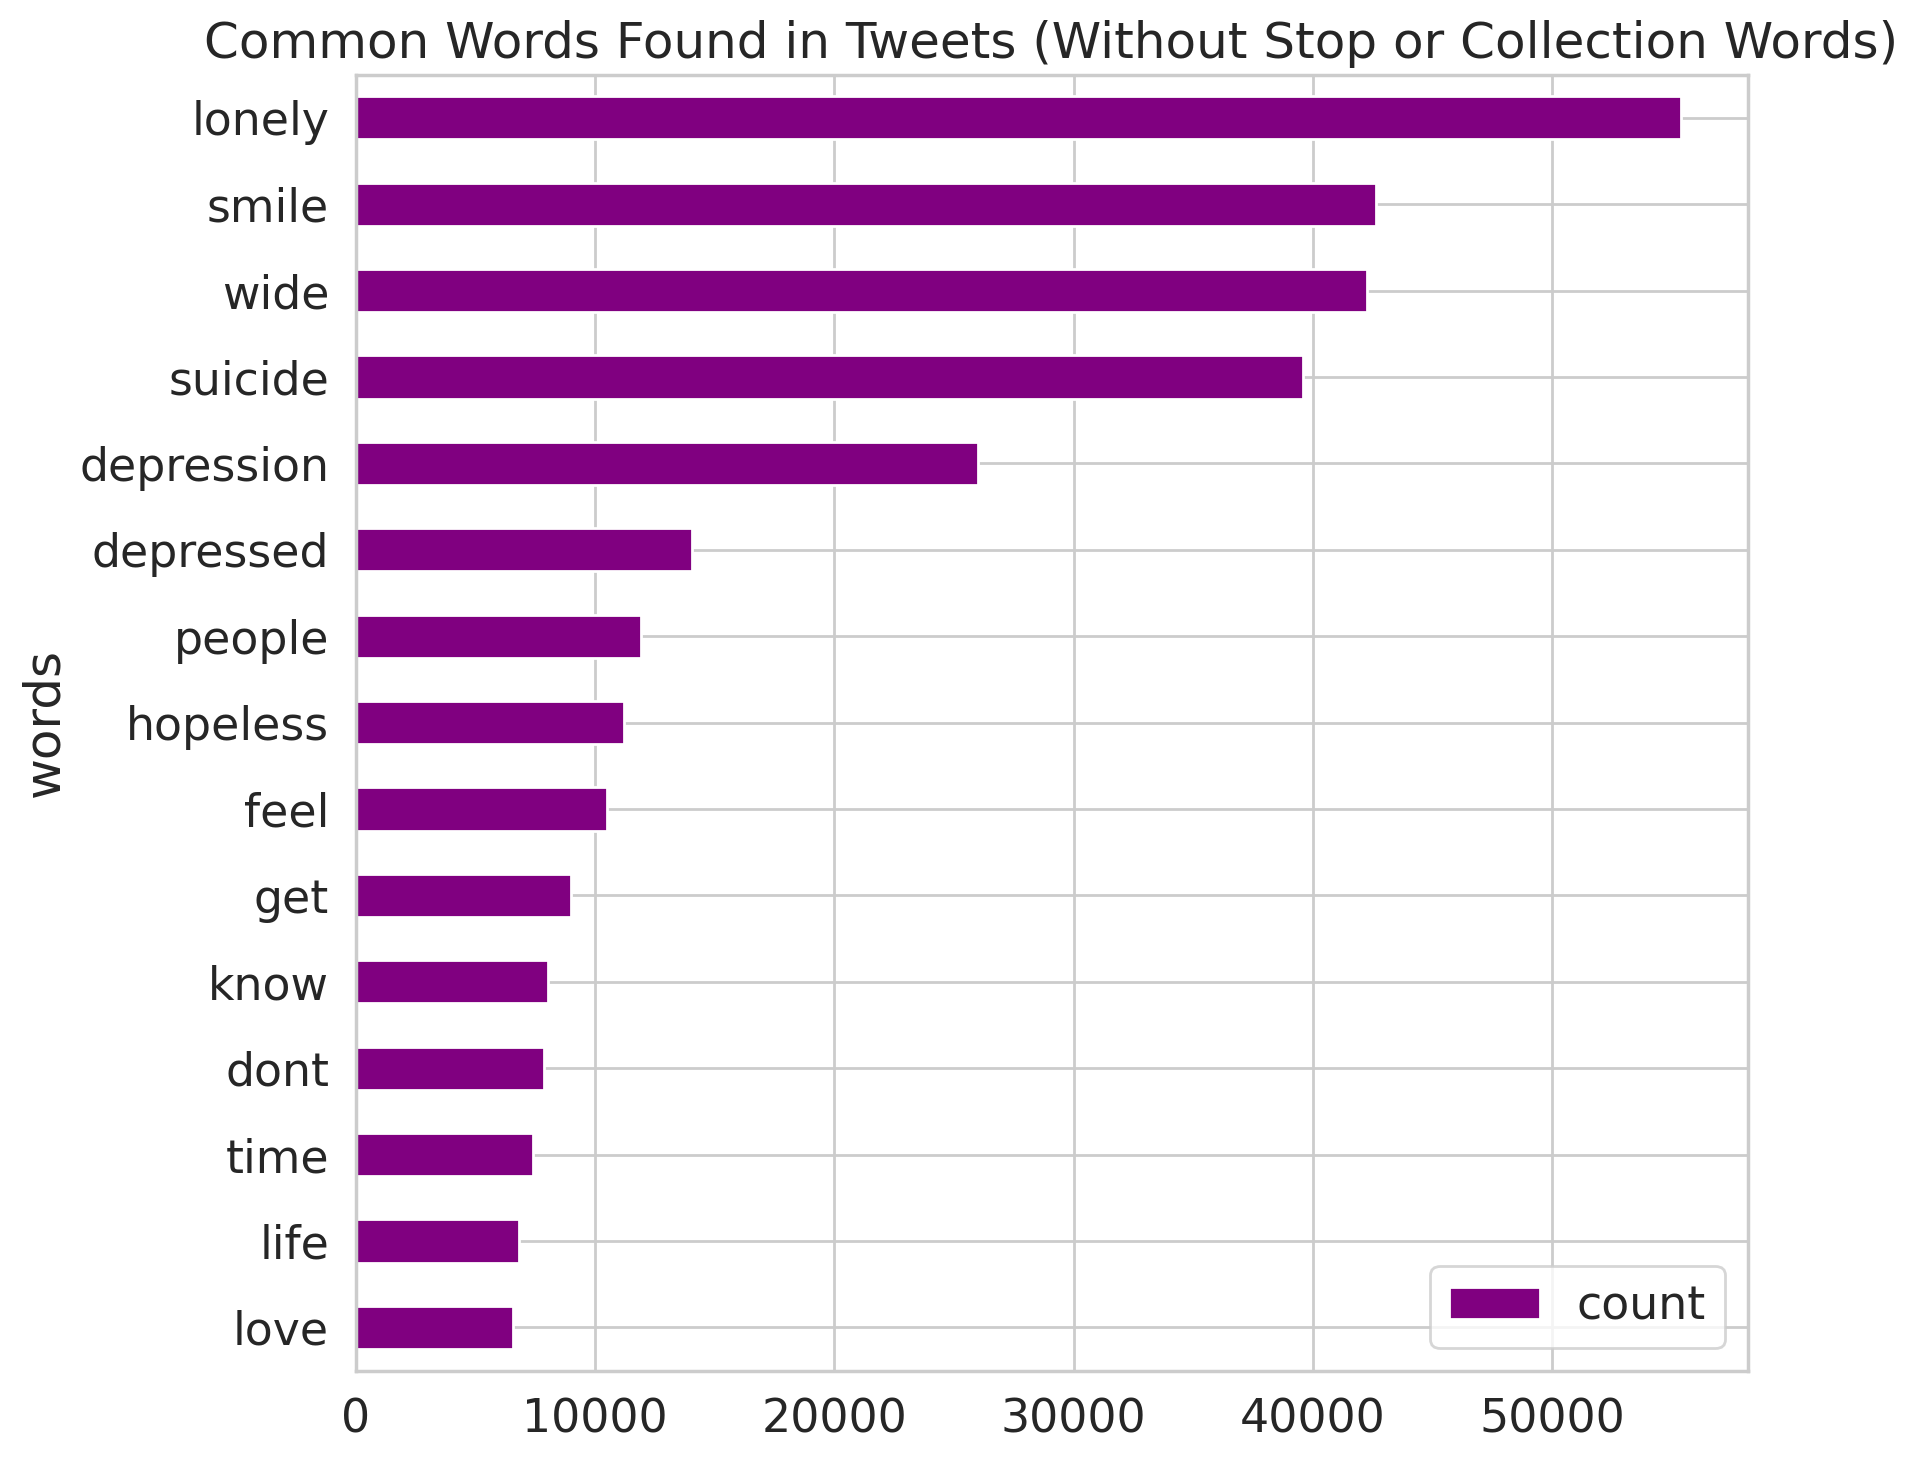

In [89]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [90]:
from nltk import bigrams

# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('wow', 'dad'),
 ('dad', 'yday'),
 ('yday', 'dont'),
 ('dont', 'take'),
 ('take', 'stupid'),
 ('stupid', 'depression'),
 ('depression', 'drugs'),
 ('drugs', 'anymore'),
 ('anymore', 'though'),
 ('though', 'theyre'),
 ('theyre', 'absolute'),
 ('absolute', 'worst'),
 ('worst', 'thing'),
 ('thing', 'never'),
 ('never', 'need'),
 ('need', 'aint'),
 ('aint', 'great'),
 ('great', 'family'),
 ('family', 'supportive'),
 ('supportive', 'moms'),
 ('moms', 'sisters'),
 ('sisters', 'stance'),
 ('stance', 'similar'),
 ('similar', 'btw')]

In [91]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('smile', 'wide'), 42185),
 (('afraid', 'loneliness'), 4641),
 (('feel', 'lonely'), 3541),
 (('suicide', 'squad'), 2769),
 (('commit', 'suicide'), 2624),
 (('committed', 'suicide'), 1685),
 (('feeling', 'lonely'), 1645),
 (('mental', 'health'), 1398),
 (('hopeless', 'romantic'), 1347),
 (('anxiety', 'depression'), 1337),
 (('suicide', 'bomber'), 1320),
 (('depression', 'anxiety'), 1278),
 (('sad', 'lonely'), 1181),
 (('social', 'media'), 958),
 (('get', 'lonely'), 922),
 (('suicide', 'prevention'), 841),
 (('committing', 'suicide'), 838),
 (('seasonal', 'depression'), 806),
 (('female', 'suicide'), 760),
 (('dont', 'know'), 741)]

In [108]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(smile, wide)",42185
1,"(afraid, loneliness)",4641
2,"(feel, lonely)",3541
3,"(suicide, squad)",2769
4,"(commit, suicide)",2624
5,"(committed, suicide)",1685
6,"(feeling, lonely)",1645
7,"(mental, health)",1398
8,"(hopeless, romantic)",1347
9,"(anxiety, depression)",1337


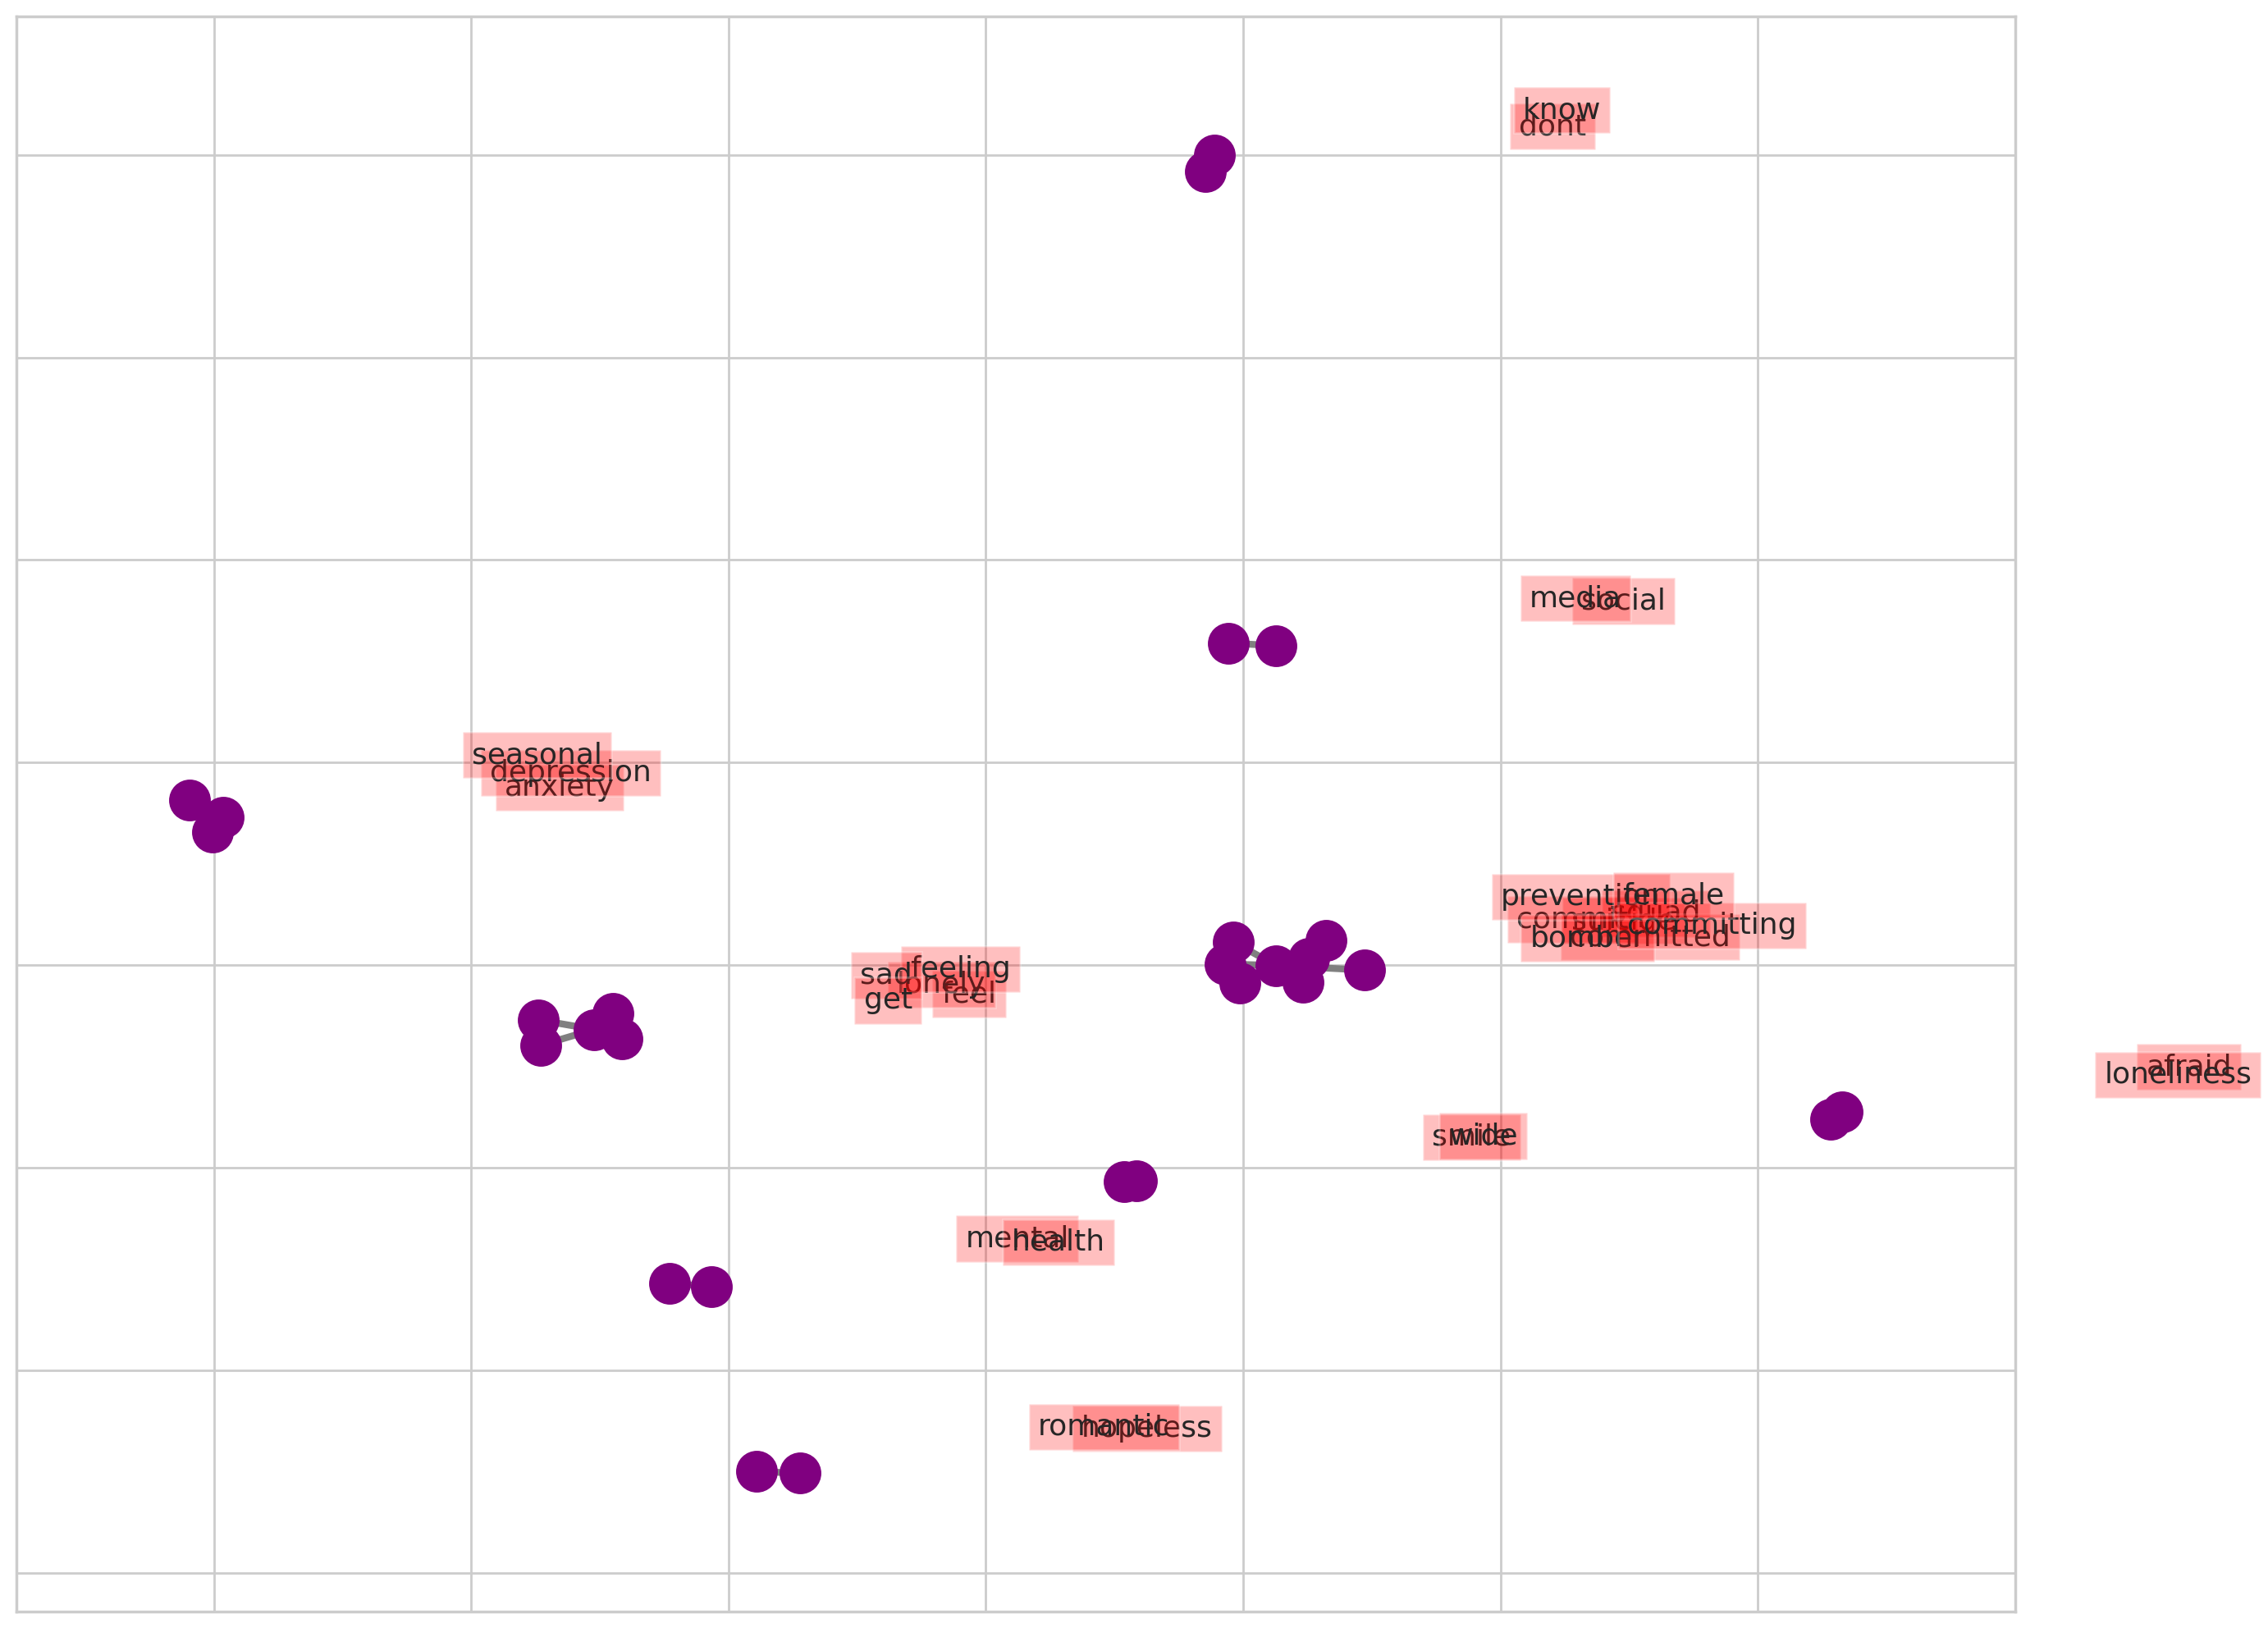

In [93]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(14, 12))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()


In [94]:
train = pd.read_csv('depressive_unigram_tweets_final.csv')
train.head()

,Unnamed: 0.1,Unnamed: 0,id,time,tweet,hashtags,cashtags
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]


In [95]:
train['word_count'] = train['tweet'].apply(lambda x: int(len(str(x).split(" "))))
train[['tweet','word_count']].head()

,tweet,word_count
0,"Wow, my dad yday: “you don’t take those stupid...",50
1,what part of this was really harmfult of a lot...,51
2,one of the ways I got through my #depression i...,33
3,see i wanna do one of them but they all say th...,24
4,IS IT clinical depression or is it the palpabl...,13


In [96]:
train['char_count'] = train['tweet'].str.len() ## this also includes spaces
train[['tweet','char_count']].head()

,tweet,char_count
0,"Wow, my dad yday: “you don’t take those stupid...",278.0
1,what part of this was really harmfult of a lot...,274.0
2,one of the ways I got through my #depression i...,235.0
3,see i wanna do one of them but they all say th...,114.0
4,IS IT clinical depression or is it the palpabl...,78.0


In [97]:
char_count = train['tweet'].str.len() ## this also includes spaces
char_count.head()

0    278.0
1    274.0
2    235.0
3    114.0
4     78.0
Name: tweet, dtype: float64

In [98]:
char_count.mean()

39.08271239713583

In [99]:
char_count.median()

28.0

In [100]:
char_count.mode()

0    27.0
Name: tweet, dtype: float64

In [102]:
word_counts = train['tweet'].apply(lambda x: int(len(str(x).split(" "))))
word_counts.head()

0    50
1    51
2    33
3    24
4    13
Name: tweet, dtype: int64

In [103]:
word_counts.mean()

4.8869669806033675

In [104]:
word_counts.median()

5.0

In [105]:
word_counts.mode()

0    1
Name: tweet, dtype: int64

(0.0, 300.0)

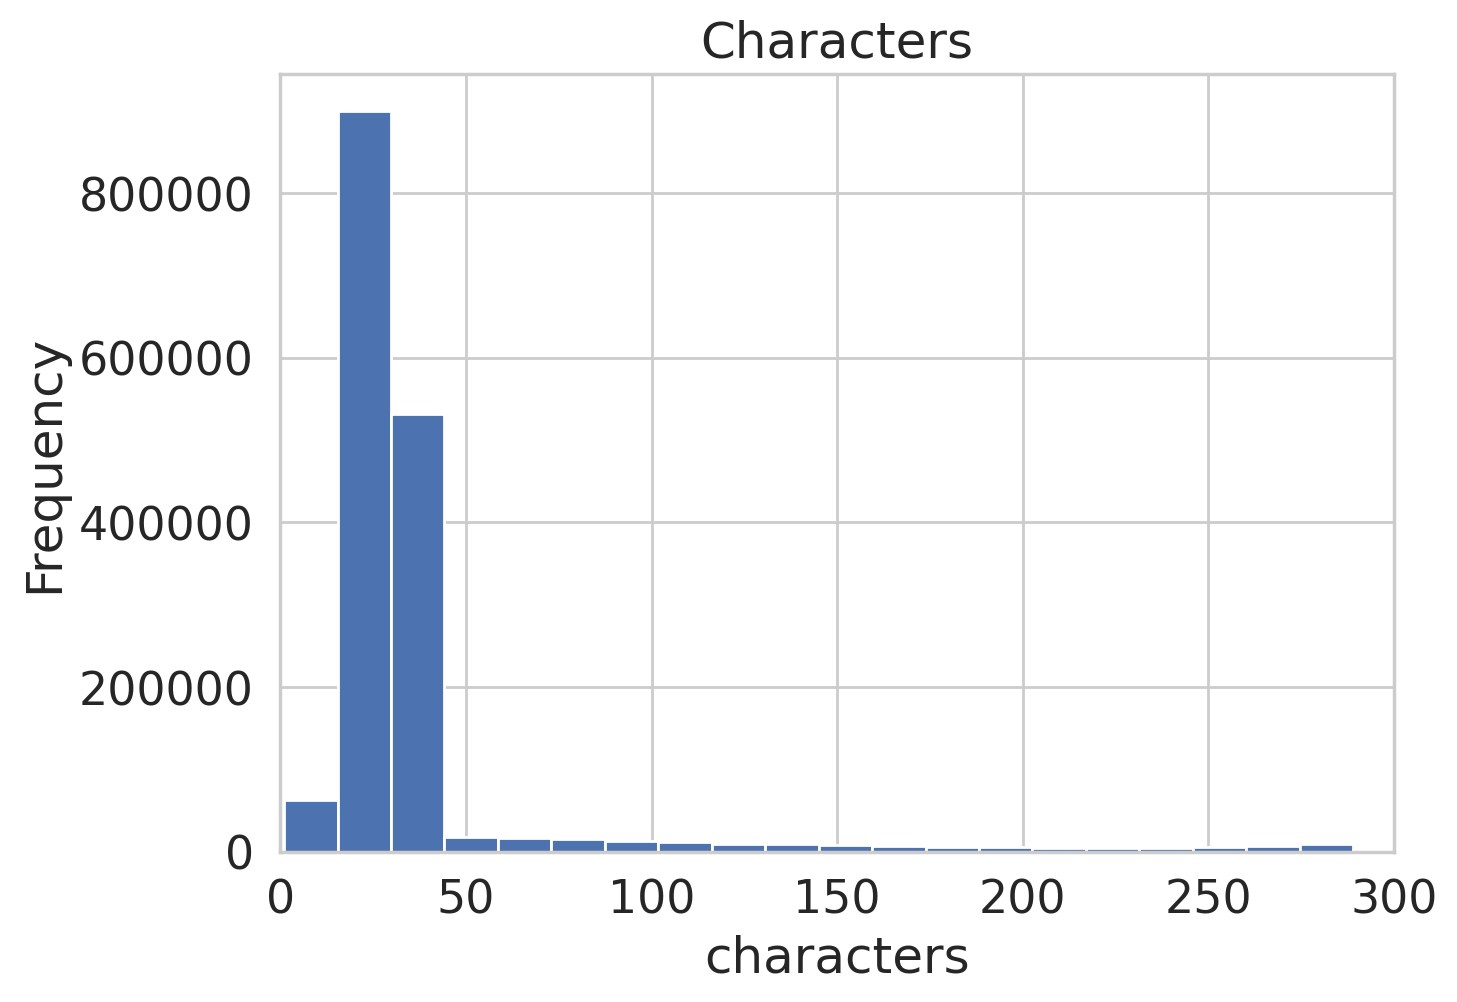

In [106]:
# Plot Histogram on x
x = char_count
plt.hist(x, bins=50)
plt.gca().set(title='Characters', ylabel='Frequency', xlabel='characters');
plt.xlim(0, 300)

(0.0, 100.0)

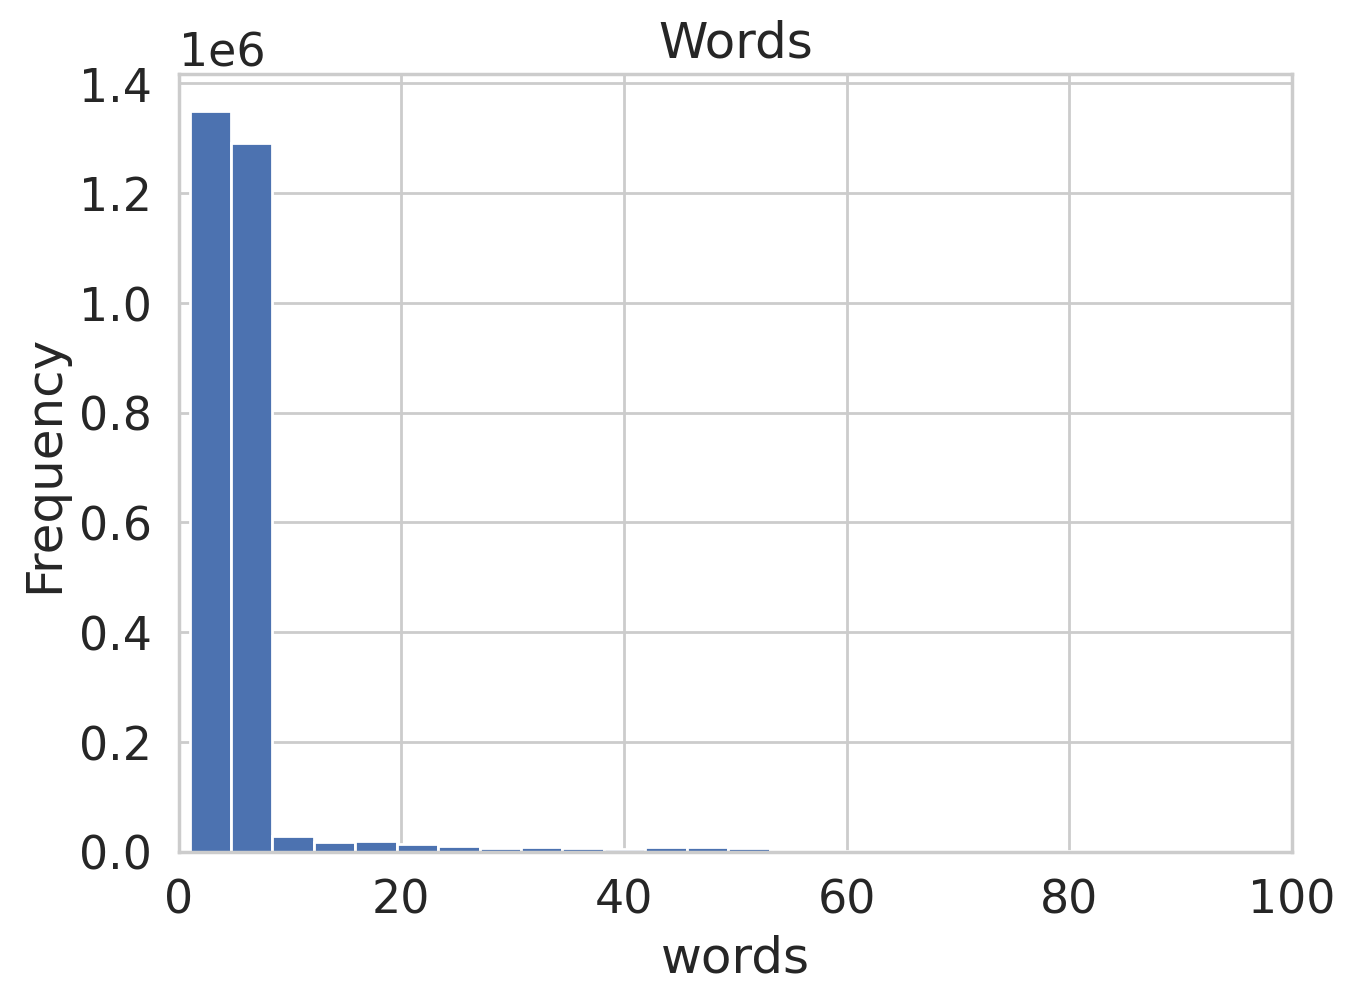

In [107]:
# Plot Histogram on x
x = word_counts
plt.hist(x, bins=50)
plt.gca().set(title='Words', ylabel='Frequency', xlabel='words');
plt.xlim(0, 100)